# Big Data Final Project
#***NBA MVP Prediction Project 2022 - Om Sanan***

##***Story/Motivation:***

 - Passion for basketball
 - Competition among friends
 - Betting on future MBP's
 - Opportunity to grow and make money
 - Could also use it for different sports which are big on betting and forecasting
 - It is interesting to see how a model interprets and is trained by the stats of previous MVP's.
 - It's also interesting to see how a person's statistics determine if they are MVP or not compared to how much they deserve it.


In [ ]:
import pandas as pd

In [ ]:
stats = pd.read_csv("om_nbamvp_data.csv")

In [ ]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [ ]:
del stats["Unnamed: 0"] #deletes first column

In [ ]:
pd.isnull(stats).sum() #checks for null data

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [ ]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]].head() #checks for null in these columns

,Player,3PA
2,Elden Campbell,0.0
3,Irving Thomas,0.0
18,Jack Haley,0.0
20,Keith Owens,0.0
30,Benoit Benjamin,0.0


In [ ]:
stats[pd.isnull(stats["FT%"])][["Player", "FTA"]].head() #checks for null in these columns

,Player,FTA
77,John Coker,0.0
92,Jason Sasser,0.0
103,Adrian Caldwell,0.0
119,Bruno Šundov,0.0
158,Jamal Robinson,0.0


In [ ]:
stats = stats.fillna(0) #replaces N/A's with 0

In [ ]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [ ]:
predictors = ["Age", "G", "GS", "MP", "FG", "FGA", 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'W', 'L', 'W/L%',
       'GB', 'PS/G', 'PA/G', 'SRS'] #variables used to predict MVP

In [ ]:
train = stats[stats["Year"] <= 2021] #training set

In [ ]:
test = stats[stats["Year"] == 2021] #testing set (smaller)

When I was going to use linear regression, it didn't work so well as I was trying to predict only the top part of the data. I also wanted to prevent overfitting so I decided to use Ridge Regression/LASSO Regression.

"***Bias vs. Varience Trade Off***"

In [ ]:
from sklearn.linear_model import Ridge #form of linear regression which prevents overfitiing
#shrinks linear regression coorelation coefficient

reg = Ridge(alpha = 0.1) #initialize ridge model
#change for better acuraccy
#alpha is how much the coefficient is goint to be shrunk

In [ ]:
reg.fit(train[predictors], train["Share"]) #fits model on predictor columns to predict share of mvp vote

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test[predictors]) #again same thing

In [ ]:
predictions = pd.DataFrame(predictions, columns = ["predictions"], index = test.index)
#coverts predictions from np array to pd dataframe

In [ ]:
predictions

,predictions
630,0.013418
631,-0.013436
632,0.004195
633,-0.001907
634,0.012424
...,...
13897,-0.013744
13898,-0.009977
13899,0.014579
13900,-0.019057


Now we will compare our actual values to our prediction to see how our model did!

In [ ]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
#combine datafranes with concat method

So now what we did is that we addes this predictions colum as you see below.

In [ ]:
combination.sort_values("Share", ascending=False).head(20) #sorts by share

,Player,Share,predictions
641,Nikola Jokić,0.961,0.150700
8624,Joel Embiid,0.580,0.161912
3651,Stephen Curry,0.449,0.135068
9907,Giannis Antetokounmpo,0.345,0.200346
1389,Chris Paul,0.138,0.070531
10997,Luka Dončić,0.042,0.143652
7464,Damian Lillard,0.038,0.111289
3536,Julius Randle,0.020,0.085244
3531,Derrick Rose,0.010,0.033319
11358,Rudy Gobert,0.008,0.092670


In [ ]:
combination.sort_values("predictions", ascending=False).head(20) #sorts by predictions

,Player,Share,predictions
9907,Giannis Antetokounmpo,0.345,0.200346
8624,Joel Embiid,0.580,0.161912
641,Nikola Jokić,0.961,0.150700
10997,Luka Dončić,0.042,0.143652
3736,LeBron James,0.001,0.140787
4177,Kevin Durant,0.000,0.136087
3651,Stephen Curry,0.449,0.135068
4174,James Harden,0.001,0.134565
11784,Zion Williamson,0.000,0.126719
6093,Jimmy Butler,0.000,0.117734


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

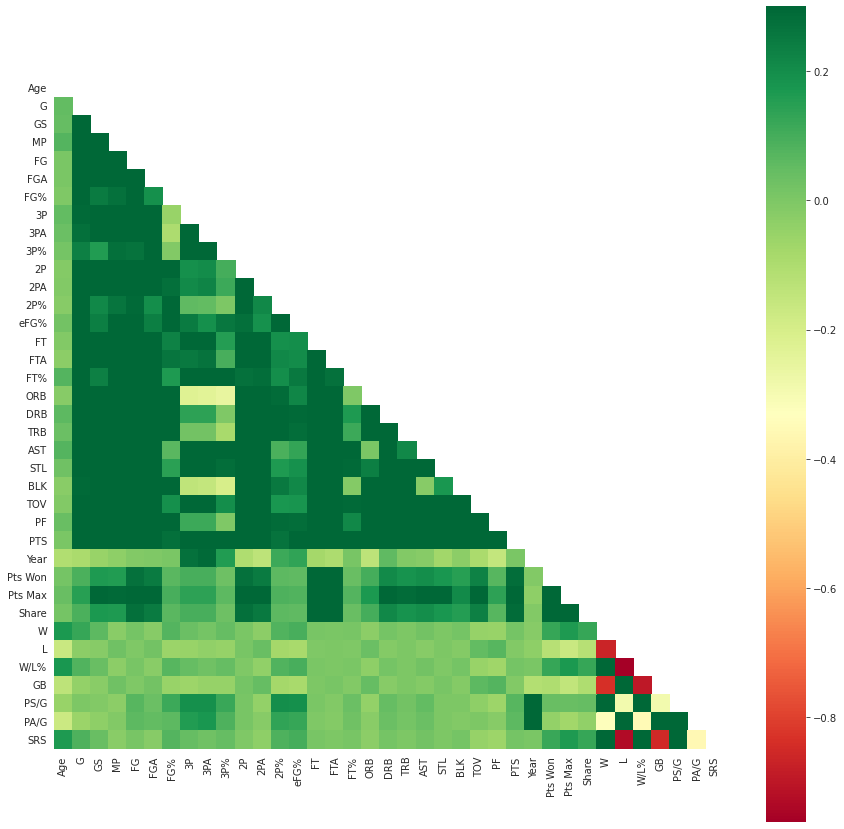

In [ ]:
#correlations of each features
corr_matrix = stats.corr()

#plot heat map
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True,cmap="RdYlGn")

In [ ]:
from sklearn.metrics import mean_squared_error #implementing error metric mse

mean_squared_error(combination["Share"], combination["predictions"])

0.0026205061430736366

Mean Squared Error function takes the actual and precicted values and comes up with an error metric. Since the mean diference is so low, this is a good mse metric although a lot of the value are zero.

In [ ]:
combination["Share"].value_counts() #out of all the share values, most of them are 0 so our mse is not that acurate

0.000    525
0.001      3
0.961      1
0.138      1
0.010      1
0.020      1
0.449      1
0.005      1
0.038      1
0.003      1
0.580      1
0.345      1
0.042      1
0.008      1
Name: Share, dtype: int64

Now let's get a new and more acurate error metric.

In [ ]:
#sorts on share of votes
actual = combination.sort_values("Share", ascending=False)
predicted = combination.sort_values("predictions", ascending=False)
#make a rank colum that uses data to assign a rank from 1 to 5
actual["Rank"] = list(range(1,actual.shape[0]+1))
predicted["Predicted_Rank"] = list(range(1,predicted.shape[0]+1))

In [ ]:
actual.merge(predicted, on="Player").head(10)

,Player,Share_x,predictions_x,Rank,Share_y,predictions_y,Predicted_Rank
0,Nikola Jokić,0.961,0.150700,1,0.961,0.150700,3
1,Joel Embiid,0.580,0.161912,2,0.580,0.161912,2
2,Stephen Curry,0.449,0.135068,3,0.449,0.135068,7
3,Giannis Antetokounmpo,0.345,0.200346,4,0.345,0.200346,1
4,Chris Paul,0.138,0.070531,5,0.138,0.070531,33
5,Luka Dončić,0.042,0.143652,6,0.042,0.143652,4
6,Damian Lillard,0.038,0.111289,7,0.038,0.111289,12
7,Julius Randle,0.020,0.085244,8,0.020,0.085244,24
8,Derrick Rose,0.010,0.033319,9,0.010,0.033319,71
9,Rudy Gobert,0.008,0.092670,10,0.008,0.092670,19


Now we can see some extra columns including the actual rank and predicted rank. It's somewhat acurate and there is a few outliers.

Now let's use the average precision error metric since it deals with ranking. So now what we're saying is did you have a person that is going to be in the top 5 in the actual top 5. If so, it gets a perfect score but if it didn't do this we will see how long it takes it to get to the correct value and score it based on that. For people like Chris Paul, we would be heavily penalized.

In [ ]:
def find_ap(combination): #creates function find ap that takes in dataframe
    #sorts dataframe by share and take the top 5 mvp winners
    #then we will sort predictions
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0  #how many of the top 5 mvp's we've found
    seen = 1 #how many total people/records we have already seen
    for index,row in predicted.iterrows(): #iterate through all rows in predicted
        if row["Player"] in actual["Player"].values: #if player is in actual top 5
            found += 1 #increments found
            ps.append(found / seen) #give ourseleves credit
        seen += 1 #increments seen

    return sum(ps) / len(ps)

In [ ]:
ap = find_ap(combination)

In [ ]:
ap #error metric for identifying MVP's - good error metric for top 5

0.7445887445887445

In [ ]:
years = list(range(1991,2022)) #predict for all years

## ***Backtesting!***

Although backtesting is rare in Machine Learning, it really helps in this particular situation with the acuraccy.

Basically what it does is that at every year I have, I train my model on the known data at the moment, and test it on future data at that moment. It repeats this for every year with a for loop.

In [ ]:
#implementing backtesting
aps = []
all_predictions = []
for year in years[5:]: #start at 5th year
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year] #year is test
    #goes year x is test and anything before that is train and then
    #does the same thing after increasing x by 1 and so on
    #makes error metric more robust
    reg.fit(train[predictors],train["Share"]) #train model
    predictions = reg.predict(test[predictors]) #make predictions
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    #makes predictions into dataframe
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    #combines predictions with actual data
    all_predictions.append(combination) #appends predictions
    aps.append(find_ap(combination)) #appends the find average precision function
    #at the end we will have all of our predictions in a dataframe and our mean_ap scores

In [ ]:
sum(aps) / len(aps) #mean_ap across all data not top couple

0.7110668523458931

In [ ]:
def add_ranks(predictions): #Let's think about the ranks we predicted vs actual
#helps us to learn how we can improve out model
   #similar to before but sorting dataframe by acual share
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rank"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rank"] = list(range(1,predictions.shape[0]+1))
    predictions["Difference"] = (predictions["Rank"] - predictions["Predicted_Rank"])
    return predictions

We just found the difference between the actual and predicted rank which helps us see anything we can improve if we have a specific problem.

In [ ]:
add_ranks(all_predictions[25]) #predictions for 1997 season

,Player,Share,predictions,Predicted_Rank,Rank,Difference
641,Nikola Jokić,0.961,0.155155,3,1,-2
8624,Joel Embiid,0.580,0.163637,2,2,0
3651,Stephen Curry,0.449,0.142490,6,3,-3
9907,Giannis Antetokounmpo,0.345,0.206428,1,4,3
1389,Chris Paul,0.138,0.073984,33,5,-28
...,...,...,...,...,...,...
10989,Boban Marjanović,0.000,0.007551,184,536,352
7926,Juancho Hernangómez,0.000,0.007718,183,537,354
11783,Willy Hernangómez,0.000,0.007735,182,538,356
5326,Ivica Zubac,0.000,0.007841,181,539,358


So now at the top we can see the top five MVPs in 1977 and their difference from the predicted ranks and the actual ranks.

Again, we are implementing a backtesting function to run it and get predictions whenever we want and to make our life a bit simpler and easier in the future.

I removed weighting from year 1 so that the previous year is weighted as much as the first year.

In [ ]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years: #go through each year
        train = stats[stats["Year"] != year] #not year is train
        #*Note!= instead of using <, I used != to prevent weighting of earlier years - improved acuraccy by 3%
        test = stats[stats["Year"] == year] #year is test
        #goes year x is test and anything before that is train and then
        #does the same thing after increasing x by 1 and so on
        #makes error metric more robust
        model.fit(train[predictors],train["Share"]) #fits model on train
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        #makes predictions into pd dataframe
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        #combines predictions with actual data
        combination = add_ranks(combination) #appends predictions
        all_predictions.append(combination) #appends the find average precision function
        aps.append(find_ap(combination))
        #at the end we will have all of our predictions in a dataframe and our mean_ap scores
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)
    #going to return these

In [ ]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)
#backtest regression model for all years from 1996 and on

In [ ]:
mean_ap
#we got the same result as before except for the fact that it is much easier to use

0.7402859426897888

Now we're going to look at diagnostics and the ten biggest differences.

In [ ]:
all_predictions[all_predictions["Rank"] < 5].sort_values("Difference").head(10)

,Player,Share,predictions,Predicted_Rank,Rank,Difference
12726,Joakim Noah,0.258,0.041423,39,4,-35
5175,Steve Nash,0.839,0.051960,26,1,-25
5193,Steve Nash,0.739,0.062012,25,1,-24
1224,Jason Kidd,0.712,0.038867,26,2,-24
5208,Steve Nash,0.785,0.071653,21,2,-19
8516,Peja Stojaković,0.228,0.047004,20,4,-16
4682,Tim Hardaway,0.207,0.067383,14,4,-10
6253,Kawhi Leonard,0.484,0.093118,10,2,-8
5256,Carmelo Anthony,0.393,0.077356,11,3,-8
2931,Damian Lillard,0.205,0.091667,12,4,-8


We just found the difference between the actual and predicted rank which helps us see anything we can improve if we have a specific problem.

Again, we are implementing a backtesting function to run it and get predictions whenever we want and to make our life a bit simpler and easier in the future.

In [ ]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis=1).sort_values(0, ascending=False)
#now we're going to combine and concat two pandas series sorted to see the most important variable to the algorithm
#basically which variables are important or not

,0,1
13,0.065312,eFG%
18,0.034362,DRB
28,0.028501,W/L%
17,0.021790,ORB
10,0.015914,2P
21,0.012054,STL
15,0.011474,FTA
22,0.011175,BLK
20,0.007435,AST
25,0.006140,PTS


Adding more predictors to give the model more information.

In [ ]:
mean_ap

0.7402859426897888

In [ ]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[28:], predictors)

In [ ]:
mean_ap

0.7846309246309247

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

Now with this Standard Scalar, I am going to scale the data and make it easier to use and to have a better accuracy.

In [ ]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year].copy()
        test = stats[stats["Year"] == year].copy()
        sc.fit(train[predictors])
        train[predictors] = sc.transform(train[predictors])
        test[predictors] = sc.transform(test[predictors])
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions), combination

In [ ]:
reg = Ridge(alpha = 0.5) #initialize ridge model

In [ ]:
mean_ap, aps, all_predictions, combination = backtest(stats, reg, years[5:], predictors)

In [ ]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())
#make stats dataframes for each year where we apply a lambda function which is a function with just one line of code
#in this case it is x divided my the mean
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]
#adding it to out stats dataframe
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,0.476,...,0.707,5.0,106.3,99.6,6.73,1.013334,0.420714,0.961127,0.673469,0.508587
1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,0.477,...,0.707,5.0,106.3,99.6,6.73,1.614653,1.028412,1.647646,0.673469,4.577279
2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,0.455,...,0.707,5.0,106.3,99.6,6.73,0.311795,0.093492,0.274608,1.571429,0.000000
3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,0.340,...,0.707,5.0,106.3,99.6,6.73,0.200440,0.186984,0.274608,0.000000,0.000000
4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,0.492,...,0.707,5.0,106.3,99.6,6.73,2.383005,1.636110,1.784950,0.897959,1.525760


So now in a category like PTS_R, we can see how people did against the mean. For example, people like James Worthy scored a lot more points than the average since his number is about 2.4 which is well over 1. Now we will add these values to our predictors.

In [ ]:
predictors += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [ ]:
mean_ap, aps, all_predictions, combination = backtest(stats, reg, years[5:], predictors)

In [ ]:
mean_ap
#we did improve a little bit on our error metric

0.7187044695007473

In [ ]:
#now turning these colums into a category and getting the category codes
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes
#here we se if whatever team the person is on affects if they are the mvp or not
stats["NTm"].value_counts()

7     499
27    495
14    493
8     493
11    492
17    491
12    490
0     485
9     480
31    479
1     479
26    476
15    475
18    475
13    474
5     473
24    468
19    466
30    465
34    464
29    463
28    463
10    461
33    421
36    387
20    343
16    331
32    263
25    214
4     177
2     165
3     157
23    145
21    143
37    114
6     113
35     88
22     32
Name: NTm, dtype: int64

In [ ]:
mean_ap

0.7187044695007473

Having a higher or lower number here doesn't mean anything or tell the algorithm anything. In order for an algorithm to understand this we can't really use a linear regression algorithm so we'll use a Random Forest model.

In [ ]:
#sorts on share of votes
actual = combination.sort_values("Share", ascending=False)
predicted = combination.sort_values("predictions", ascending=False)
#make a rank colum that uses data to assign a rank to a player they got
actual["Actual Rank"] = list(range(1,actual.shape[0]+1))
predicted["Predicted_Rank"] = list(range(1,predicted.shape[0]+1))
actual.merge(predicted, on="Player").head(20)

,Player,Share_x,predictions_x,Predicted_Rank_x,Rank_x,Difference_x,Actual Rank,Share_y,predictions_y,Predicted_Rank_y,Rank_y,Difference_y
0,Nikola Jokić,0.961,0.143982,3,1,-2,1,0.961,0.143982,3,1,-2
1,Joel Embiid,0.580,0.151076,2,2,0,2,0.580,0.151076,2,2,0
2,Stephen Curry,0.449,0.141059,5,3,-2,3,0.449,0.141059,5,3,-2
3,Giannis Antetokounmpo,0.345,0.198884,1,4,3,4,0.345,0.198884,1,4,3
4,Chris Paul,0.138,0.063299,33,5,-28,5,0.138,0.063299,33,5,-28
5,Luka Dončić,0.042,0.142530,4,6,2,6,0.042,0.142530,4,6,2
6,Damian Lillard,0.038,0.111071,10,7,-3,7,0.038,0.111071,10,7,-3
7,Julius Randle,0.020,0.078629,27,8,-19,8,0.020,0.078629,27,8,-19
8,Derrick Rose,0.010,0.024993,85,9,-76,9,0.010,0.024993,85,9,-76
9,Rudy Gobert,0.008,0.088492,17,10,-7,10,0.008,0.088492,17,10,-7


### ***Random Forest Regressor***

 - Creates a series of decision trees and averages the predictions from those trees
 - Created decision trees for accuracy
 - Uses averaging to improve accuracy

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

#creates decision trees to be more acurate - takes a long time to run though
rf = RandomForestRegressor(n_estimators = 400, random_state = 1, min_samples_split = 5)
#random state at 1 makes it so that the values are the same every time we run it
#min samples spit says dont make a new branch until there is 5 values on each node

mean_ap, aps, all_predictions, combination = backtest(stats, rf, years[28:], predictors + ["NPos", "NTm"])
#we're also going to compare it to our regression model

In [ ]:
#with 100 n_estimators and random_state 1
mean_ap

0.8204352278545827

In [ ]:
#with 200+ n_estimators
mean_ap

0.8488479262672811

In [ ]:
#with 300+ n_estimators
mean_ap

0.8488479262672811

In [ ]:
#with 400+ n_estimators
mean_ap

0.8497835497835498

### ***Story***
- **Pretty good 85% Error Metric With Random Forest Model**
- **Opportunities for further growth of the model! (Expand)**
- ***Betting?***
- **Now I can get an advantage over my friends!**
- ## ***Make an app with the most acurate model!***